# 주제

- 나라별 확진자가 급증한 구간, 급감한 구간을 알아본다.
- 급격하게 변한 구간에 어떠한 영향들이 미쳤는지 알아본다.(중국입국금지 등등 정책)
- 코로나 감소를 위해 어떠한 정책들을 해야 하는가

# 나라별 확진자수 데이터

- 나라별 확진자수 데이터를 갖고와서, 확진자 증감폭의 변화를 살펴본다.
- 중국 입국을 막은 나라와, 안 막은 나라 비교
- 각 나라별 코로나 관련 대표정책을 알아보고, 이 증감폭과 비교해봐서 어느 대책이 필요한지 알아본다.


# 필요한 데이터 셋

- 나라별 중국 입국금지 데이터 셋
- 나라별 코로나 대응 정책 데이터 셋

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
world = pd.read_csv("time_series_covid_19_confirmed.csv")
world

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
world.shape

(262, 79)

In [54]:
world.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [82]:
world.duplicated(['Country/Region'])

0      False
1      False
2      False
3      False
4      False
       ...  
257    False
258     True
259     True
260    False
261    False
Length: 262, dtype: bool

In [84]:
world['Country/Region'].value_counts()

China             33
Canada            15
France            11
United Kingdom    11
Australia          8
                  ..
Luxembourg         1
South Africa       1
Bulgaria           1
Switzerland        1
Timor-Leste        1
Name: Country/Region, Length: 183, dtype: int64

### Lat, Long데이터는 아직 필요없으므로 삭제

In [55]:
world.drop(['Lat','Long'], axis=1, inplace=True)

In [56]:
world['Province/State'].isnull().sum()

180

### 262행중에 null이 180행이므로, 너무 많아 삭제

In [57]:
world.drop(['Province/State'], axis=1, inplace=True)

In [58]:
world

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,Albania,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,Algeria,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,Andorra,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,Angola,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Malawi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,South Sudan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
world_sum = world.groupby('Country/Region').sum()
world_sum

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
Albania,0,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
Algeria,0,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
Andorra,0,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
Angola,0,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,163,174,188,203,212,218,233,237,240,241
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,91,98,109,116,119,134,161,194,217,237
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [107]:
# 날짜를 행으로, 나라를 열로
world1 = world_sum.transpose()
world1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/1/20,237,259,847,390,8,7,1054,571,4862,10711,...,814,29865,338,181,143,218,134,0,36,8
4/2/20,273,277,986,428,8,9,1133,663,5116,11129,...,1024,34173,350,205,146,233,161,0,39,9
4/3/20,281,304,1171,439,8,15,1265,736,5330,11524,...,1264,38689,369,227,153,237,194,0,39,9
4/4/20,299,333,1251,466,10,15,1451,770,5550,11781,...,1505,42477,400,266,155,240,217,0,39,9


In [108]:
world2 = world1.reset_index()
world3 = world2.rename({'index':'date'}, axis='columns')
world3

Country/Region,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,4/1/20,237,259,847,390,8,7,1054,571,4862,...,814,29865,338,181,143,218,134,0,36,8
71,4/2/20,273,277,986,428,8,9,1133,663,5116,...,1024,34173,350,205,146,233,161,0,39,9
72,4/3/20,281,304,1171,439,8,15,1265,736,5330,...,1264,38689,369,227,153,237,194,0,39,9
73,4/4/20,299,333,1251,466,10,15,1451,770,5550,...,1505,42477,400,266,155,240,217,0,39,9


In [109]:
world3.shape

(75, 184)

# 모든 나라 시간 별 확진자 수

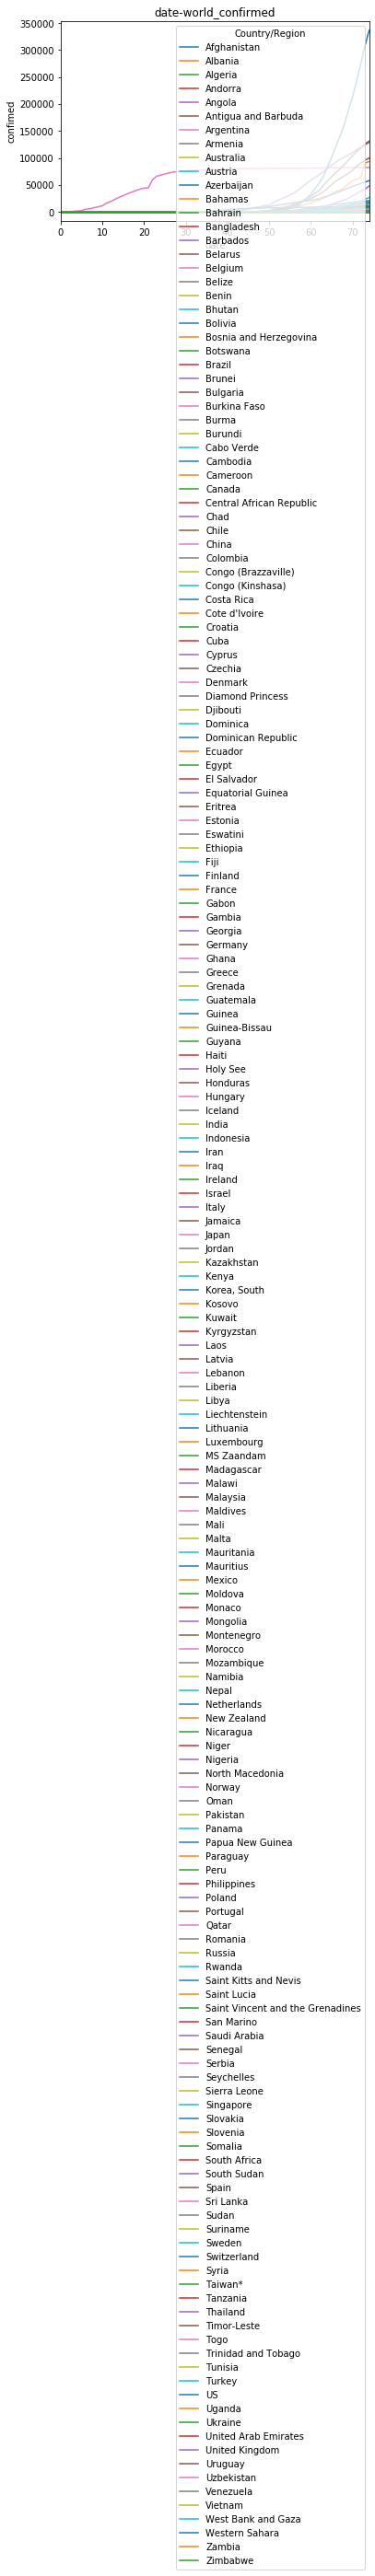

In [116]:
world3.plot()
plt.title("date-world_confirmed")
plt.xlabel("date")
plt.ylabel("confimed")
plt.show()

# 나라별 확진자수(그래프 하나씩)

In [129]:
world3.iloc[:,[0,1] ]

Country/Region,date,Afghanistan
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
70,4/1/20,237
71,4/2/20,273
72,4/3/20,281
73,4/4/20,299


0

In [131]:
world3.shape[1]

184

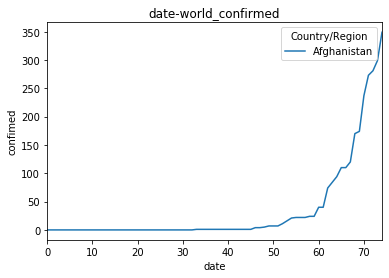

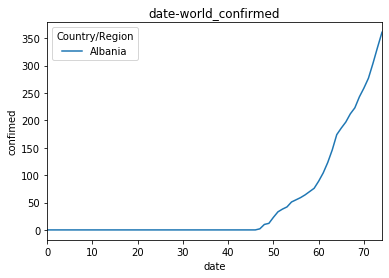

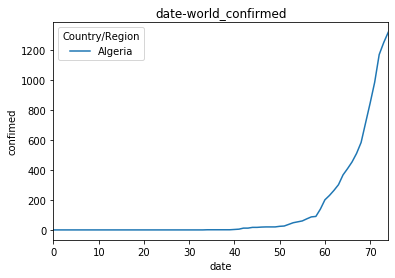

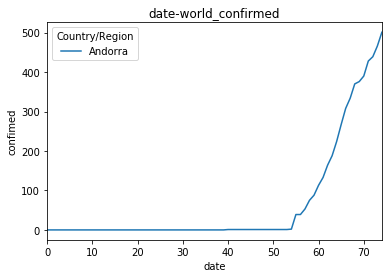

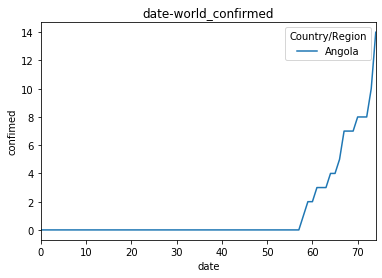

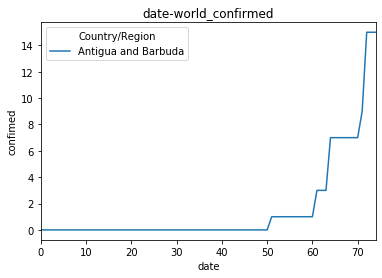

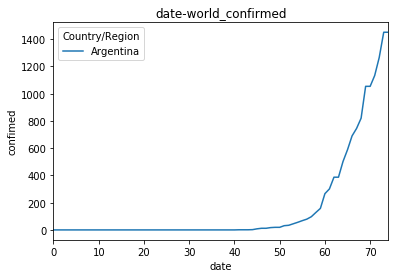

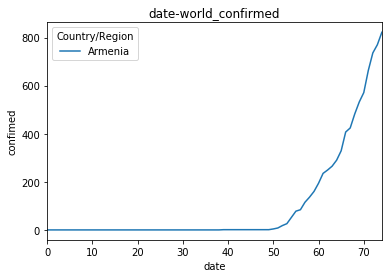

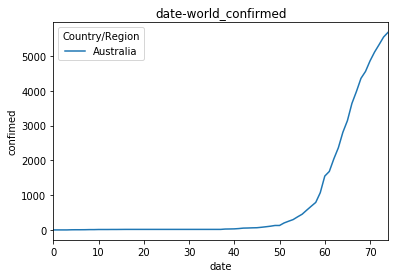

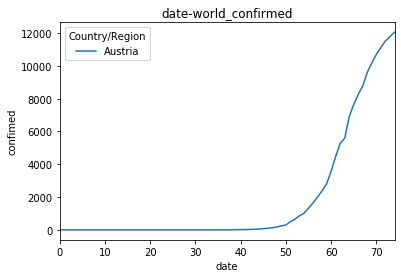

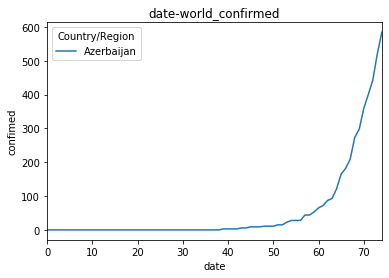

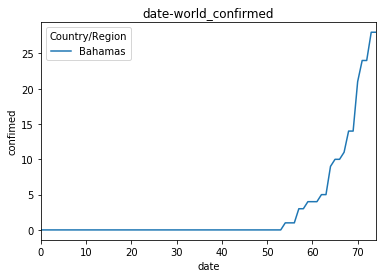

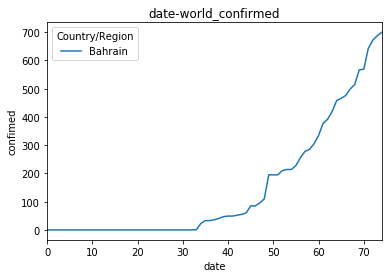

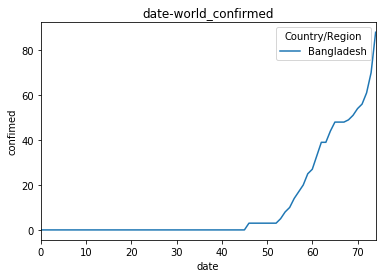

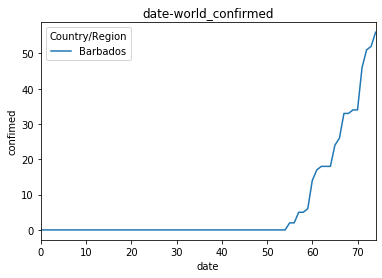

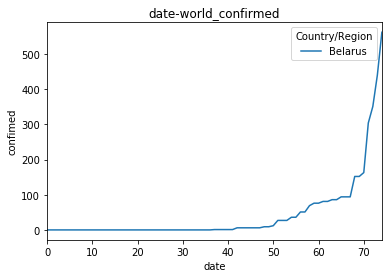

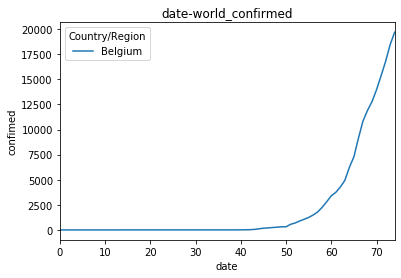

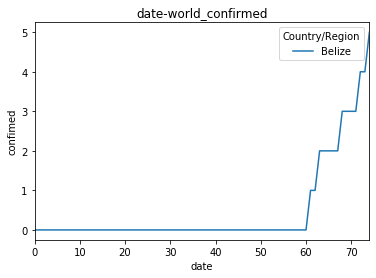

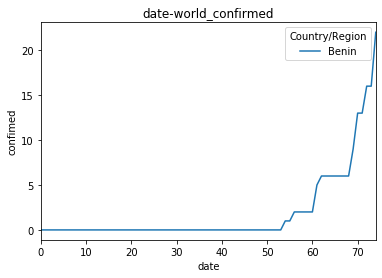

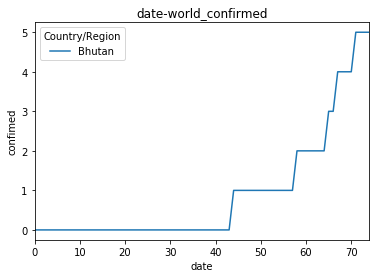

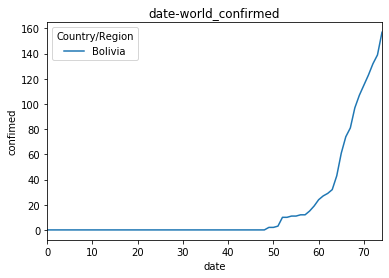

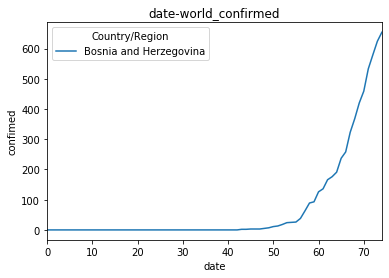

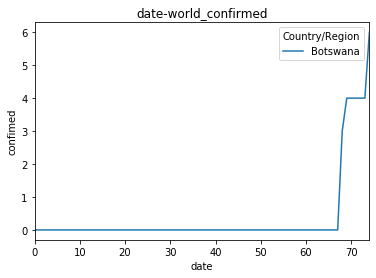

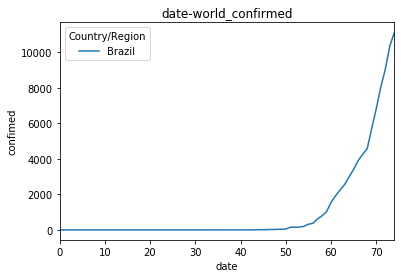

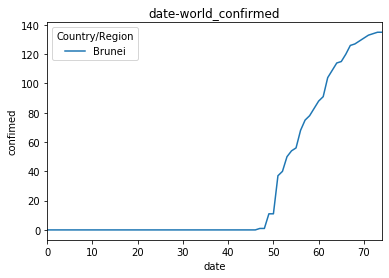

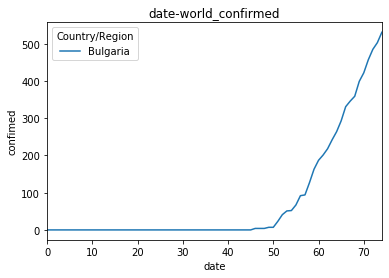

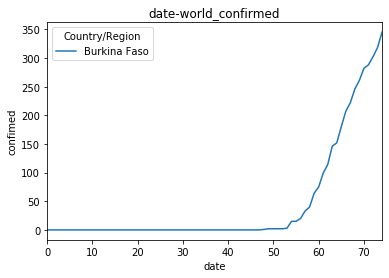

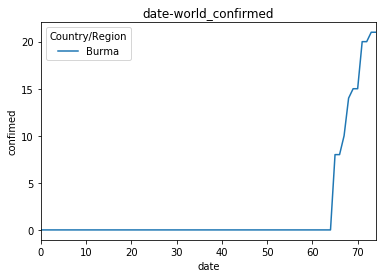

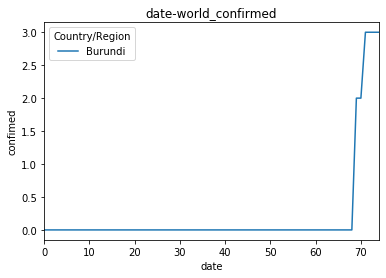

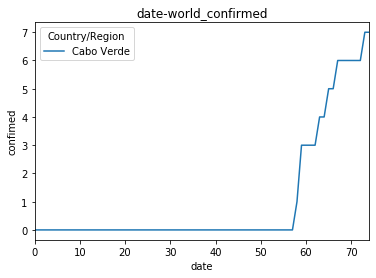

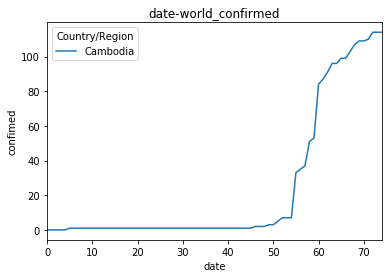

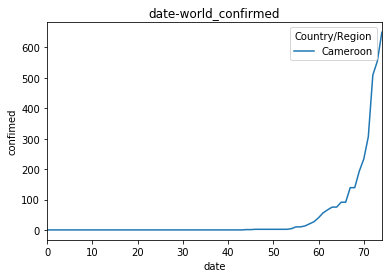

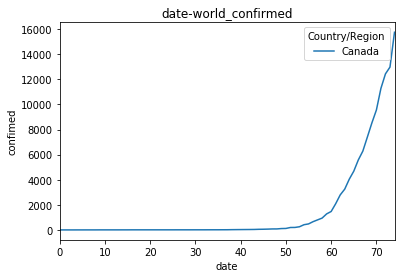

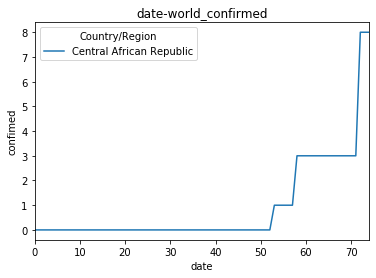

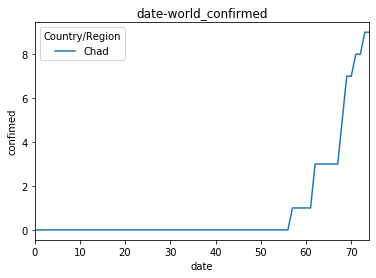

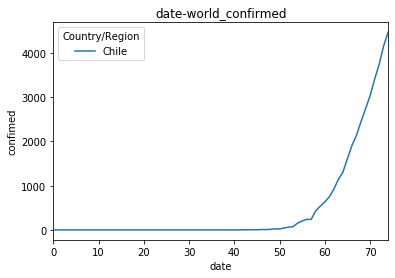

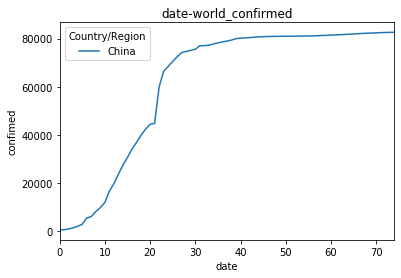

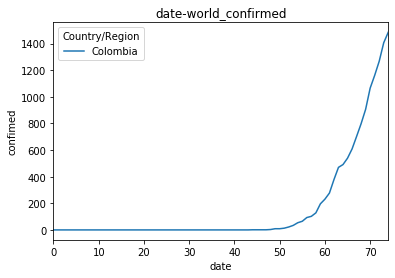

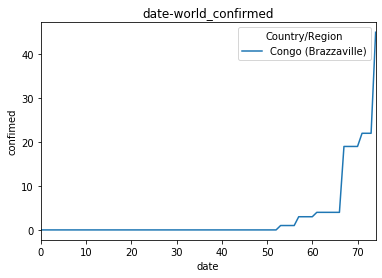

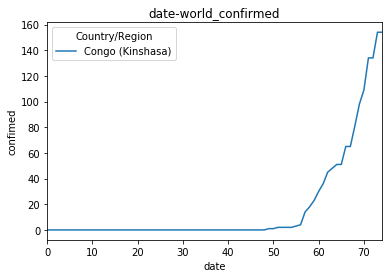

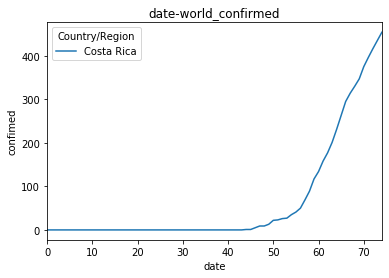

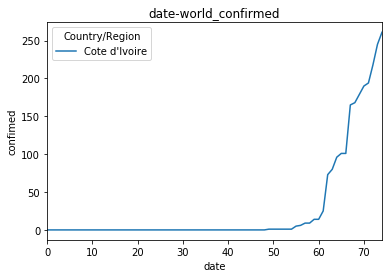

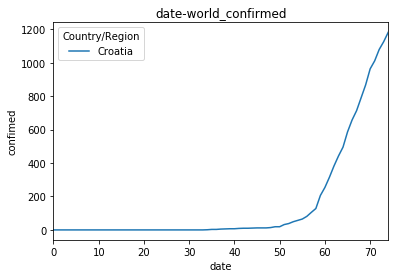

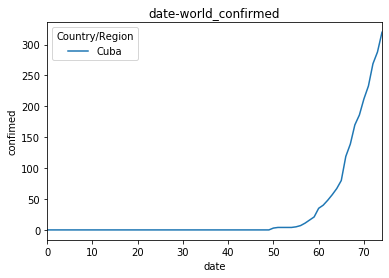

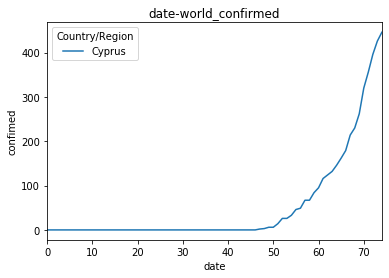

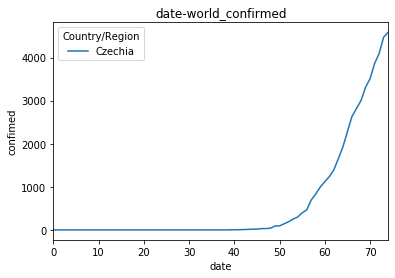

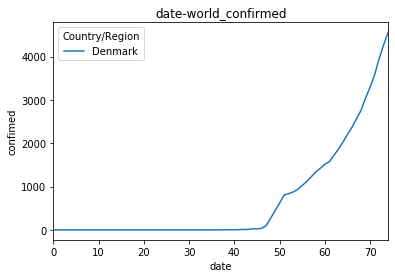

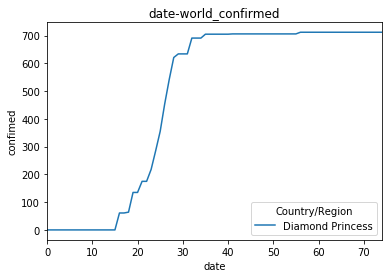

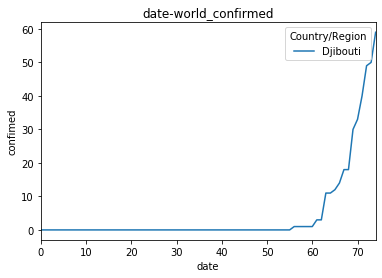

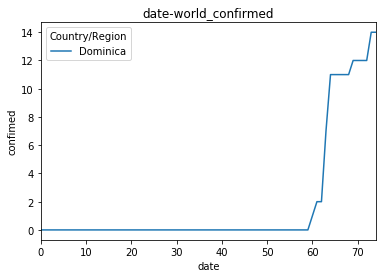

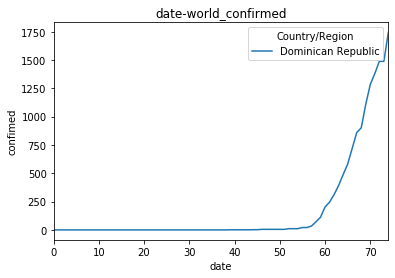

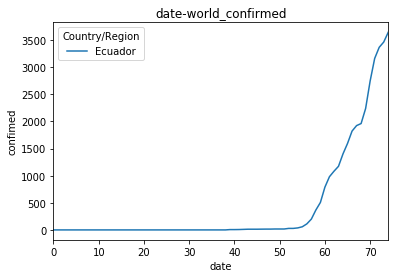

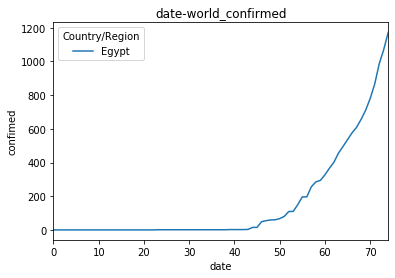

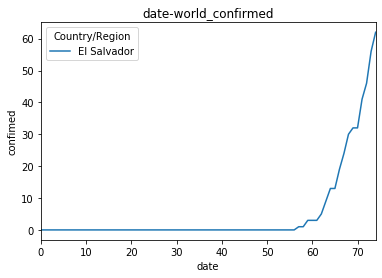

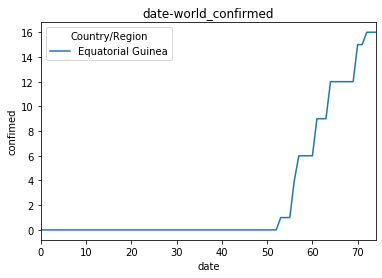

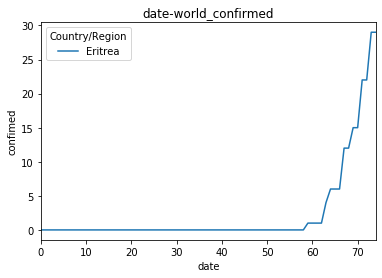

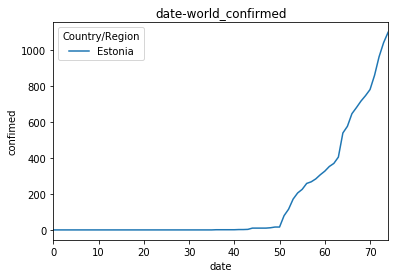

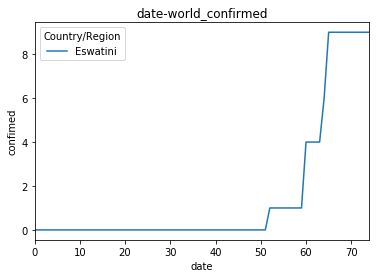

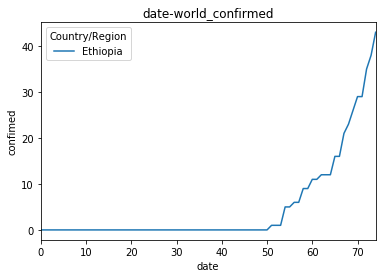

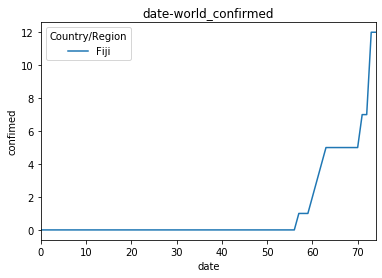

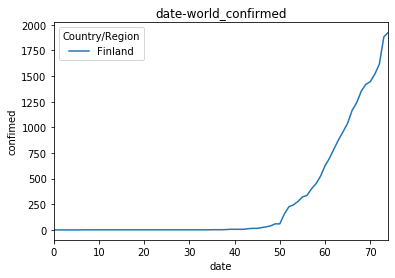

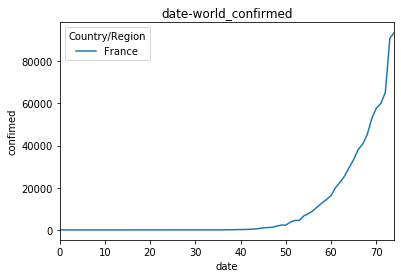

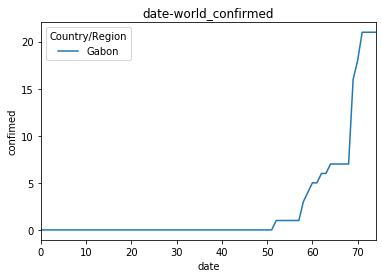

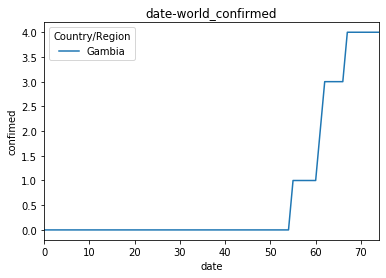

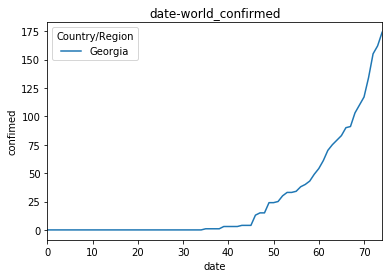

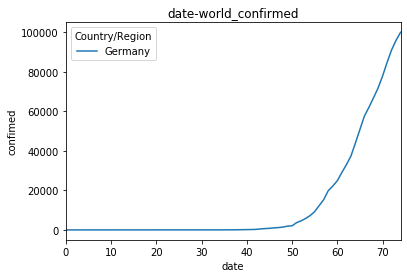

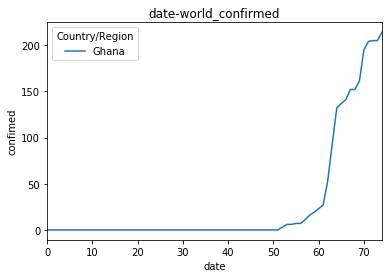

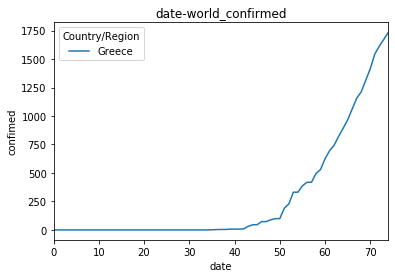

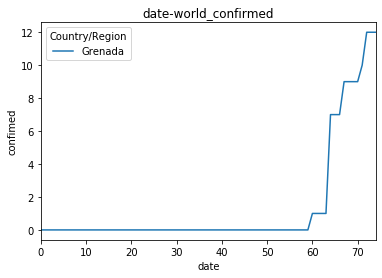

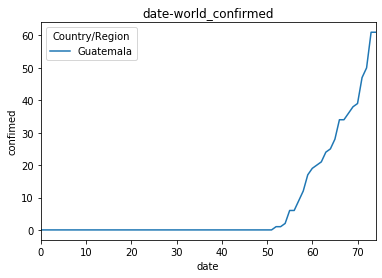

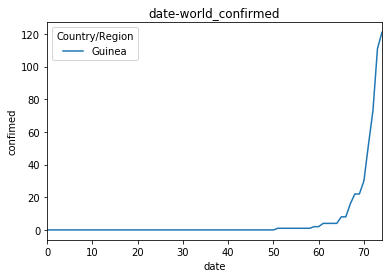

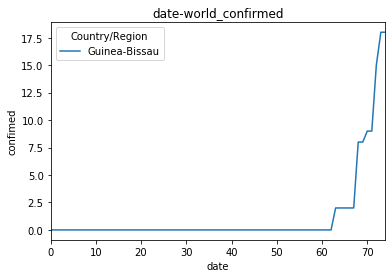

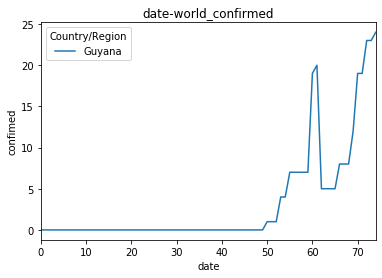

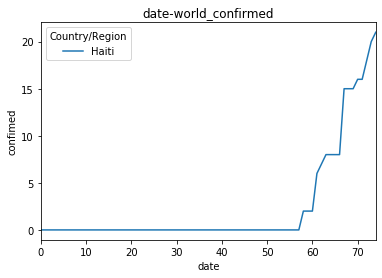

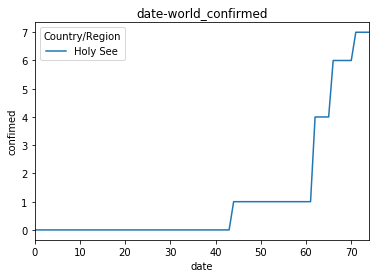

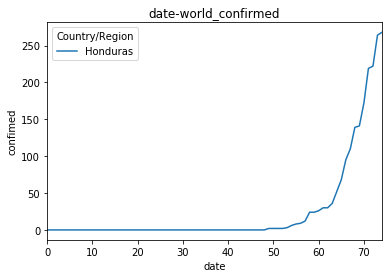

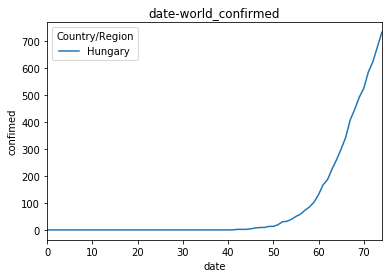

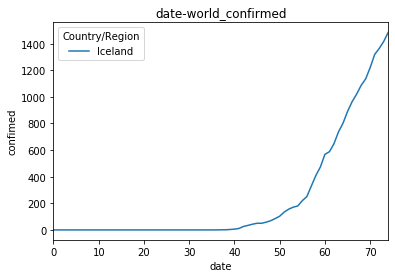

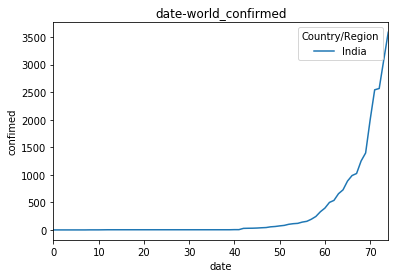

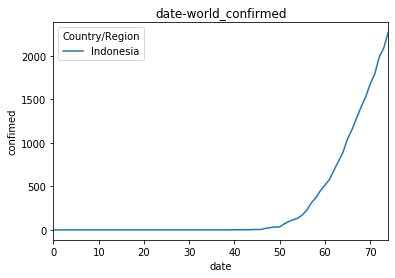

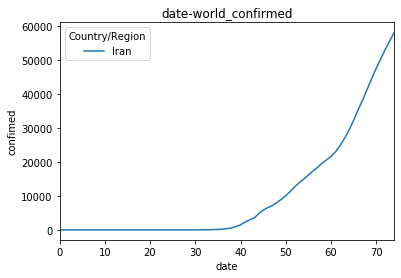

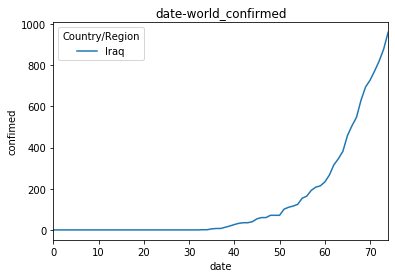

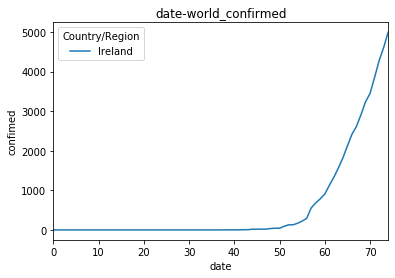

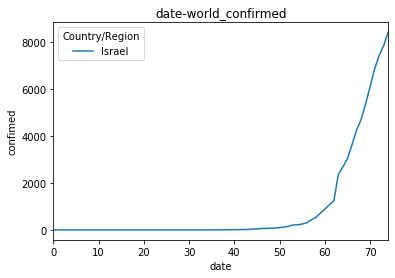

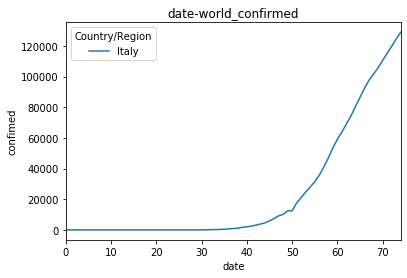

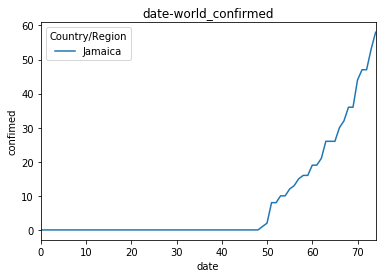

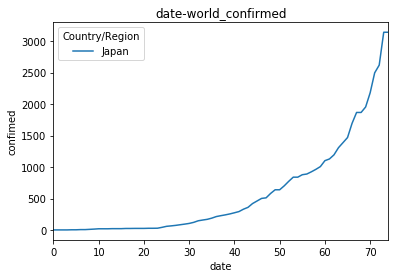

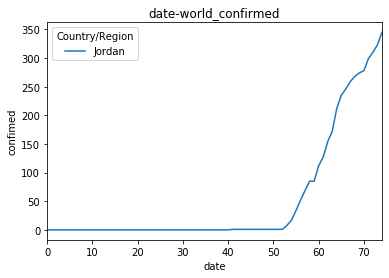

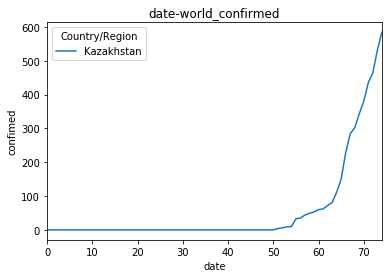

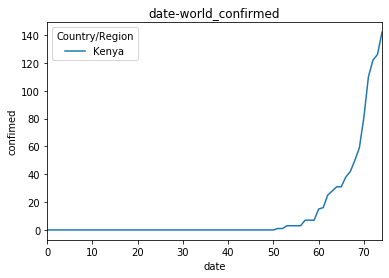

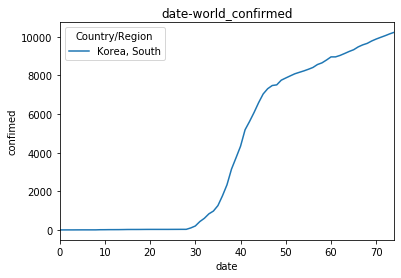

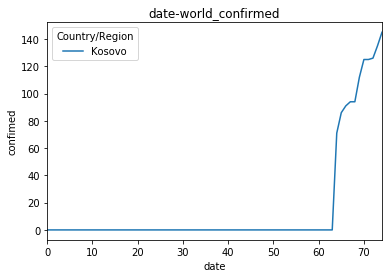

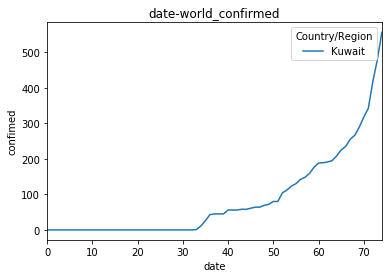

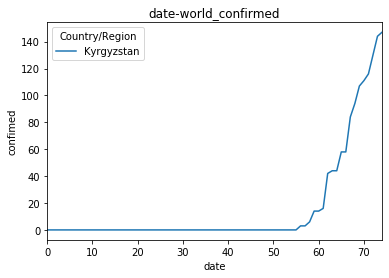

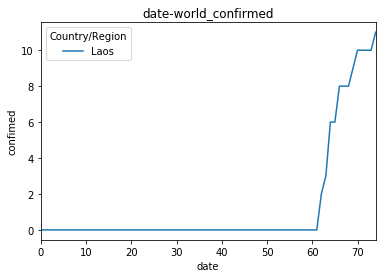

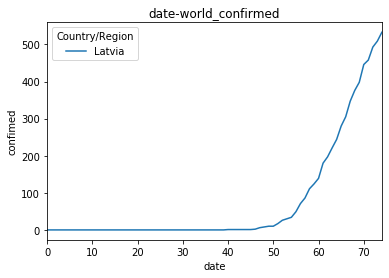

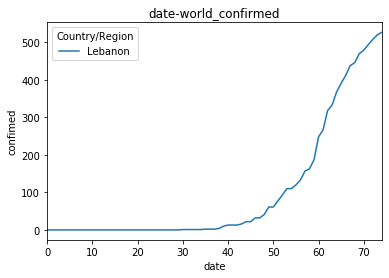

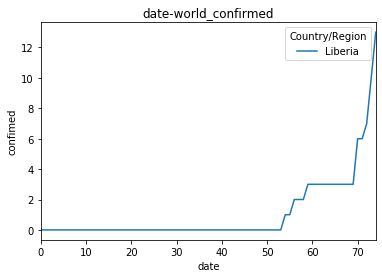

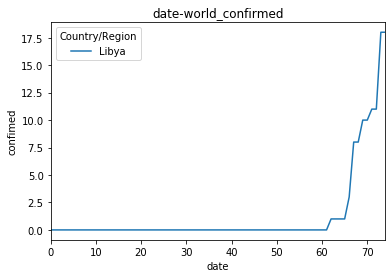

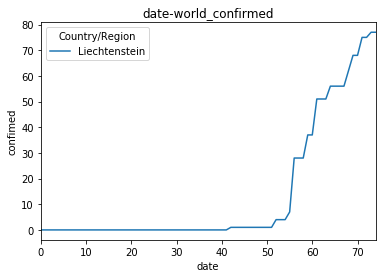

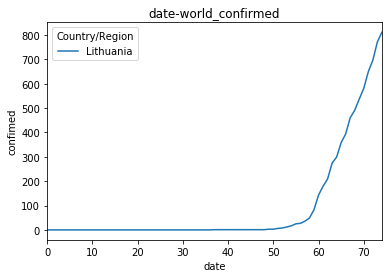

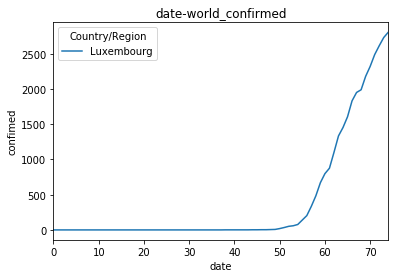

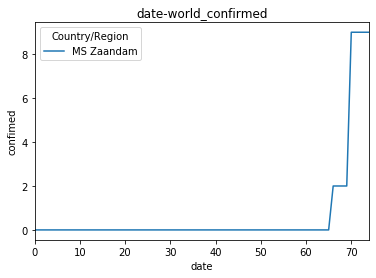

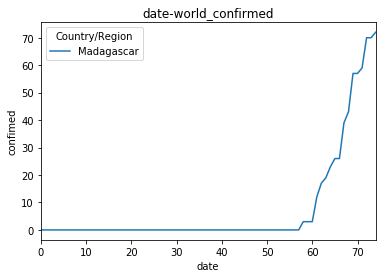

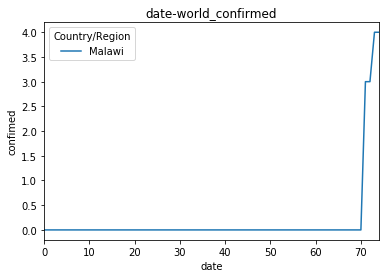

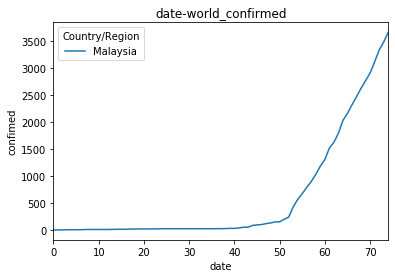

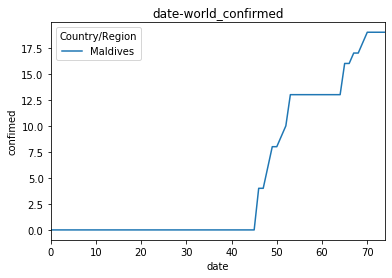

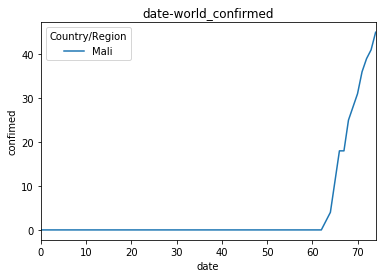

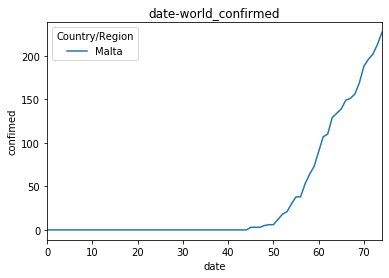

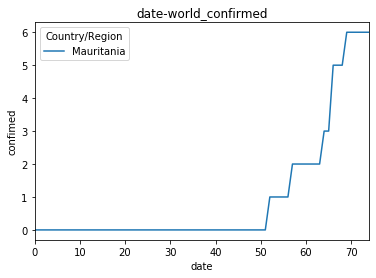

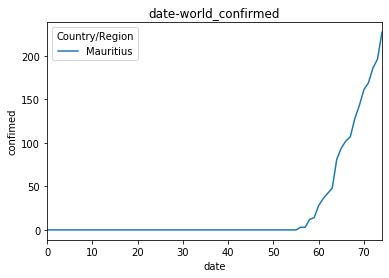

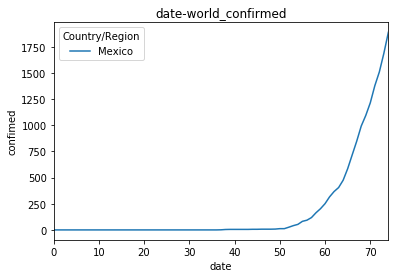

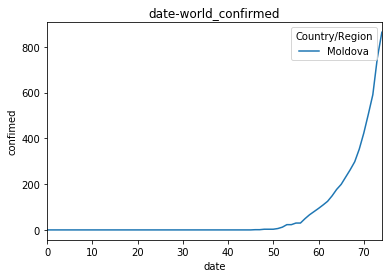

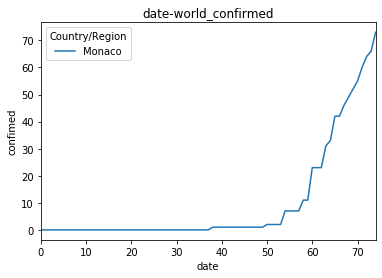

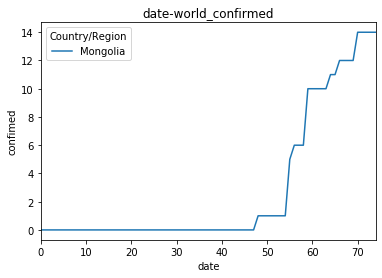

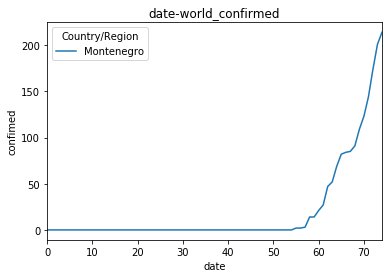

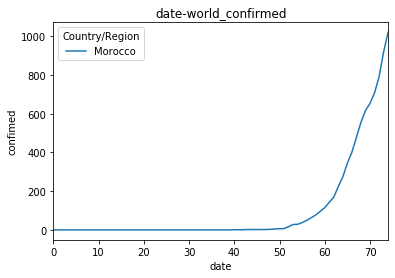

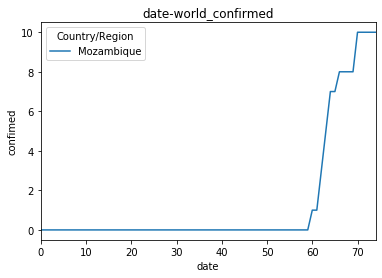

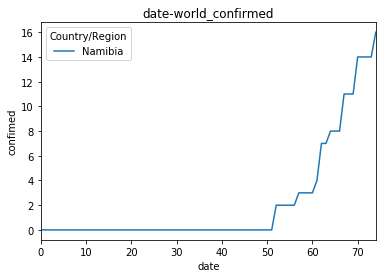

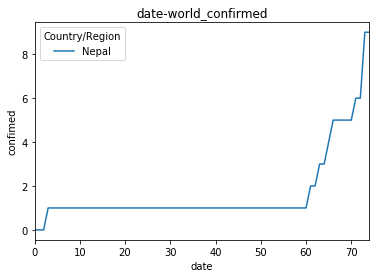

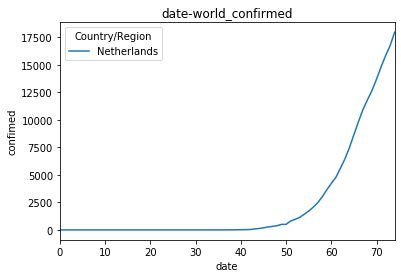

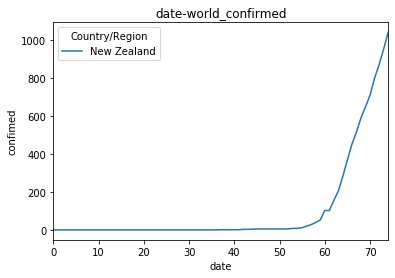

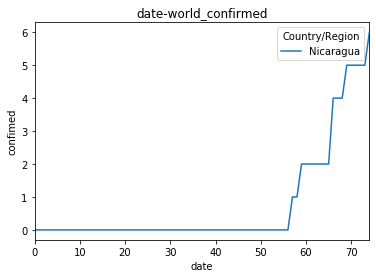

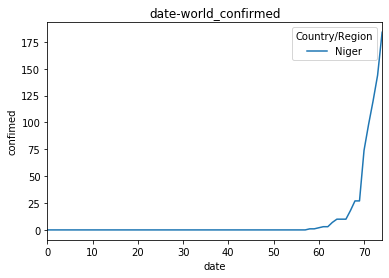

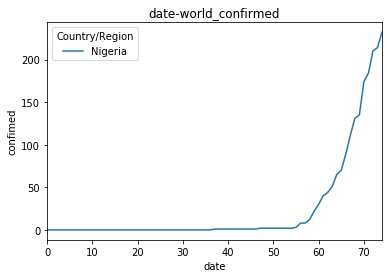

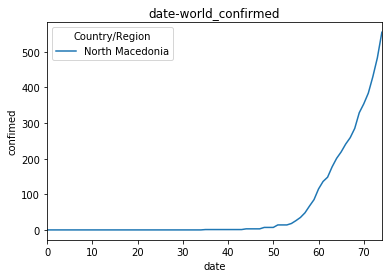

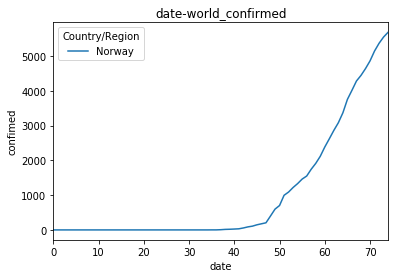

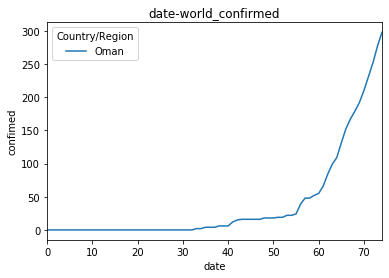

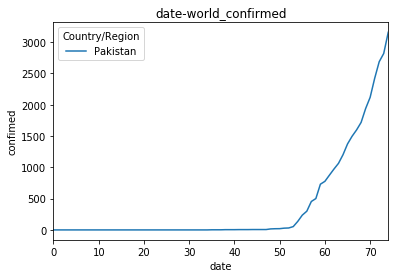

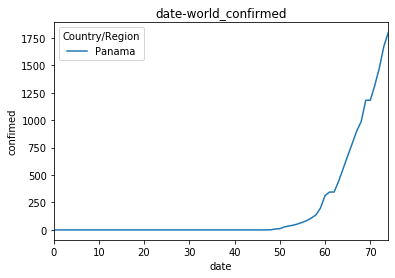

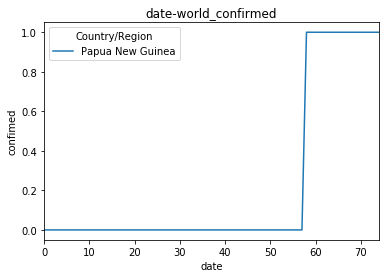

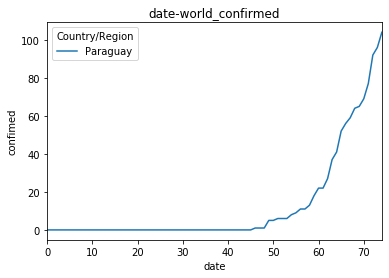

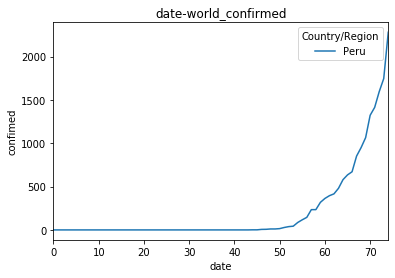

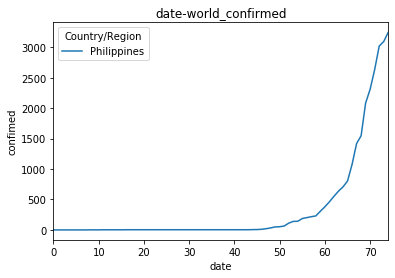

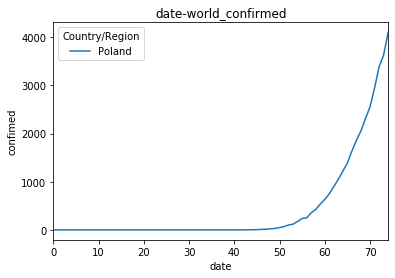

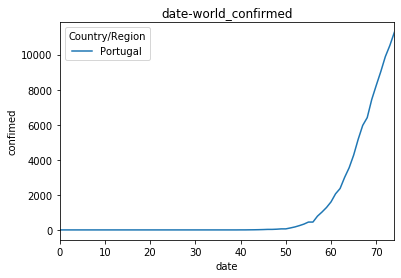

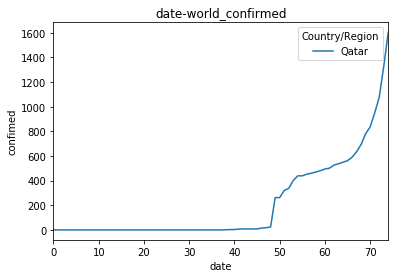

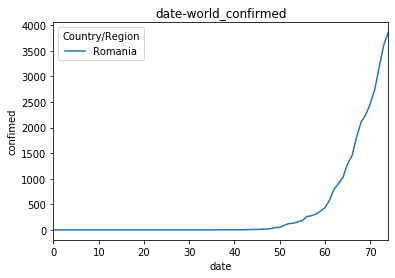

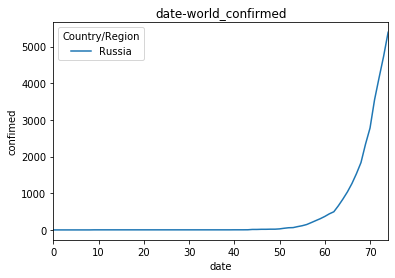

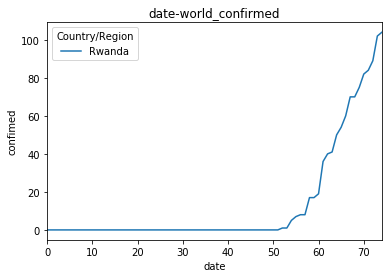

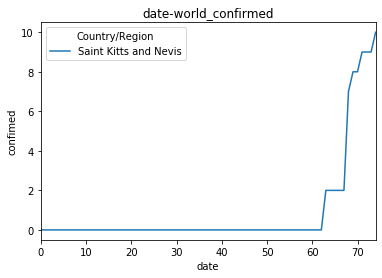

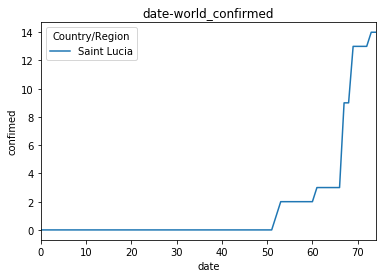

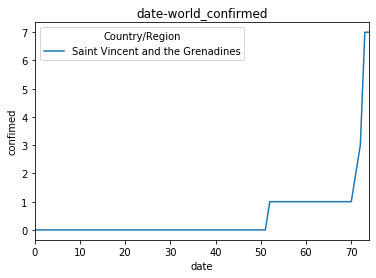

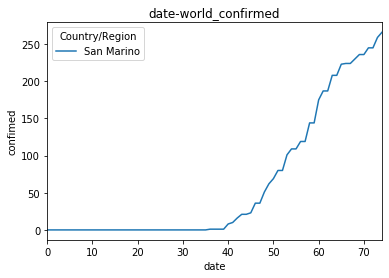

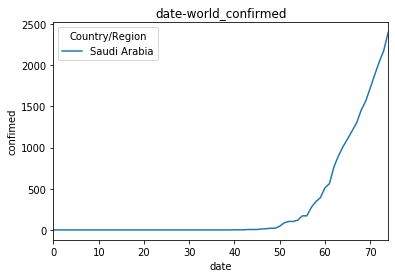

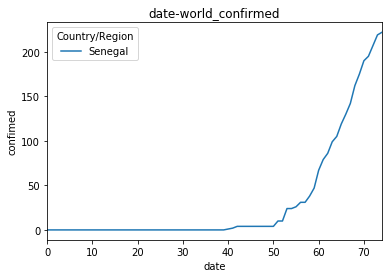

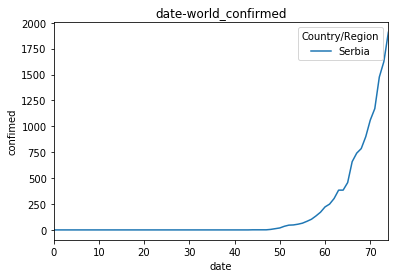

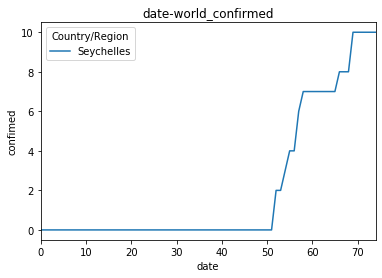

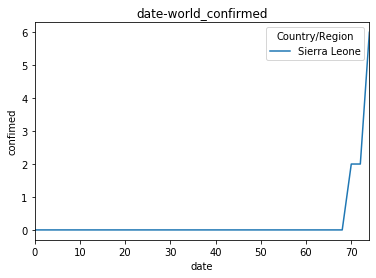

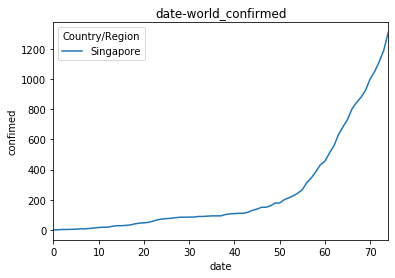

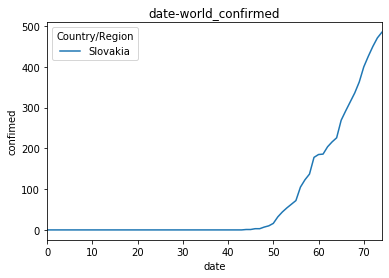

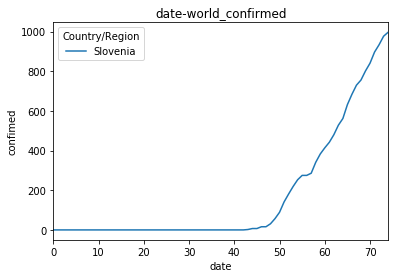

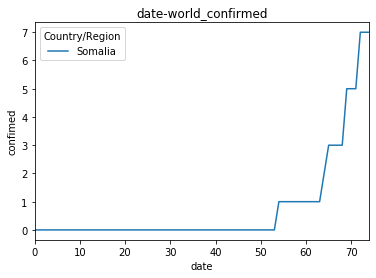

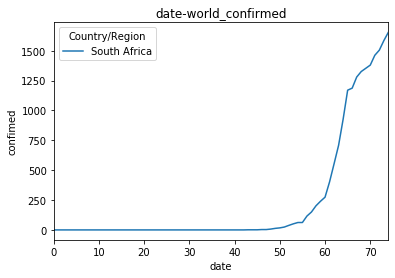

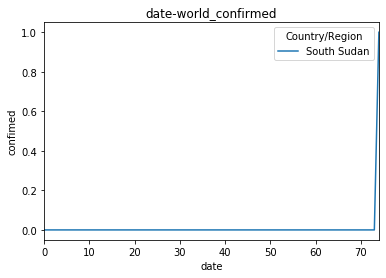

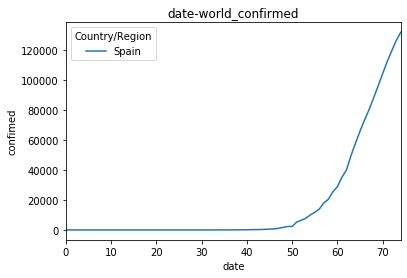

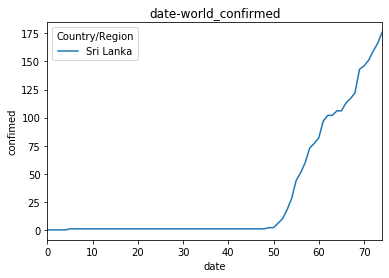

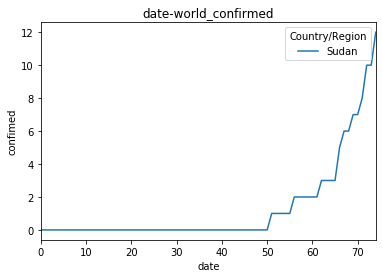

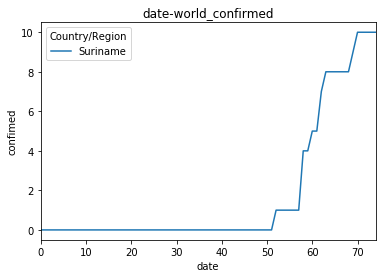

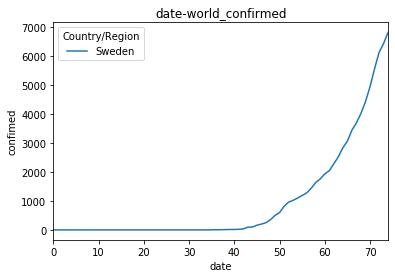

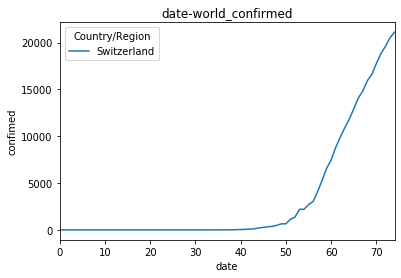

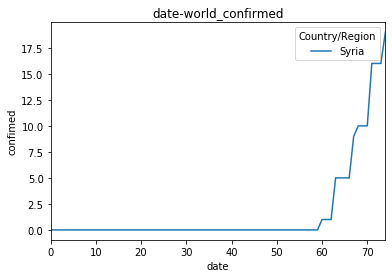

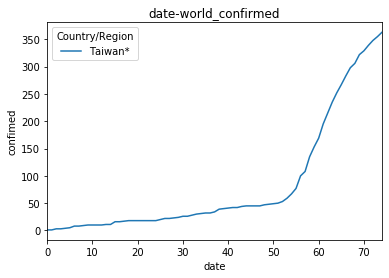

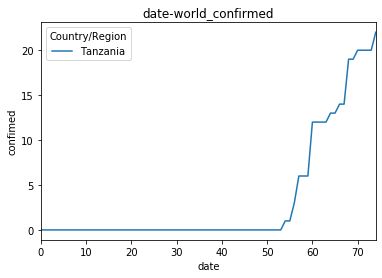

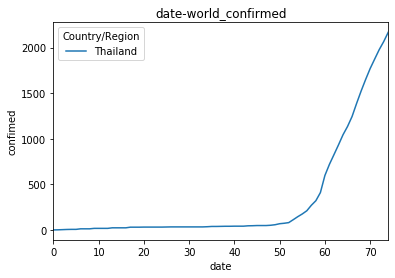

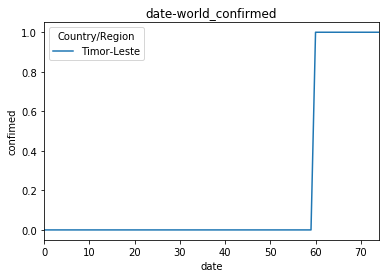

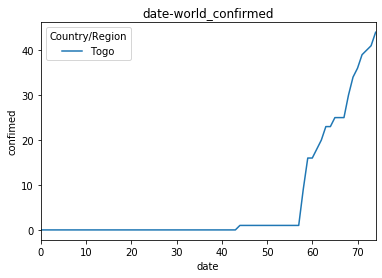

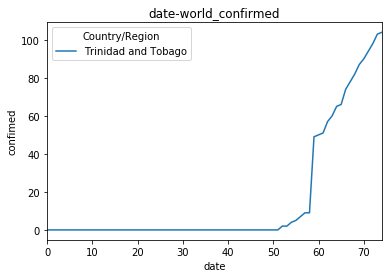

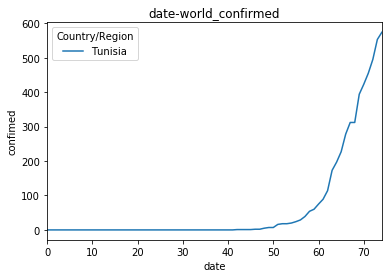

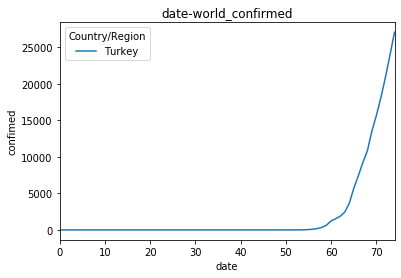

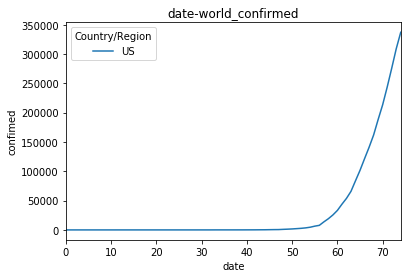

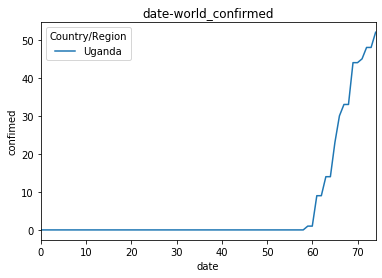

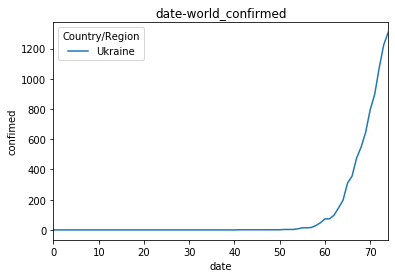

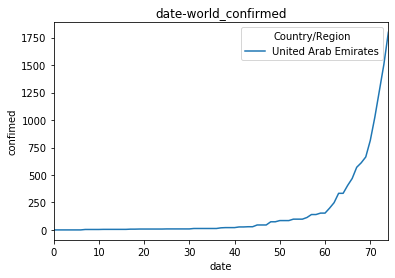

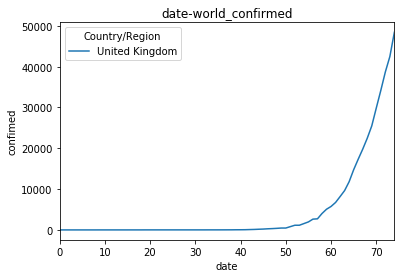

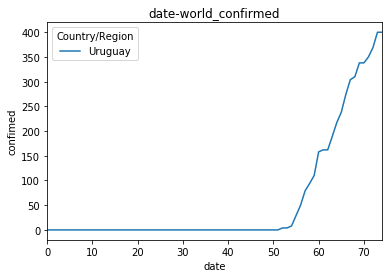

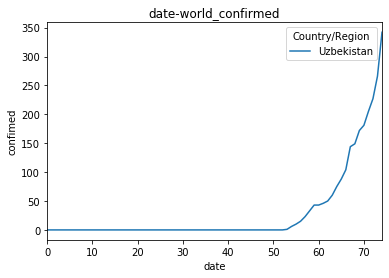

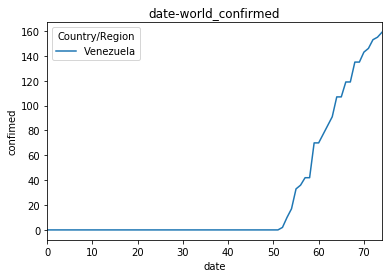

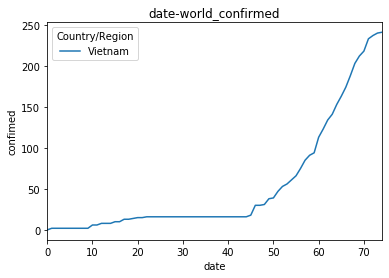

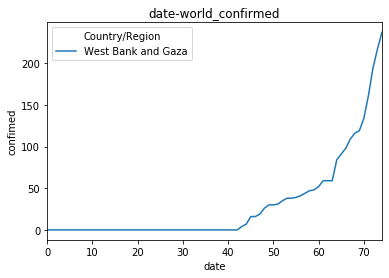

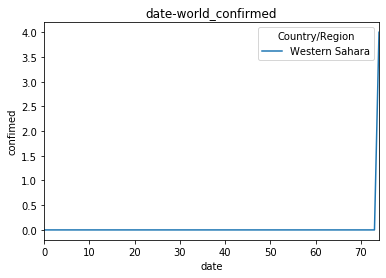

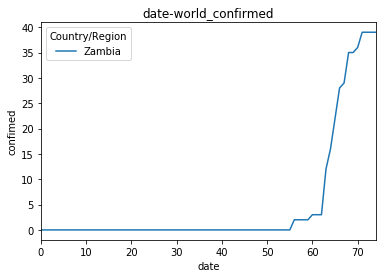

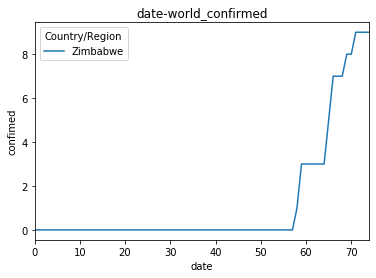

IndexError: positional indexers are out-of-bounds

In [169]:
count = 1
for i in range(world3.shape[1]):
    i += 1
    world4 = pd.DataFrame(world3.iloc[:,[0,i] ])
    
    world4.plot()
    plt.title("date-world_confirmed")
    plt.xlabel("date")
    plt.ylabel("confimed")
    plt.show()


# 두개씩 배치 하는법
# y축 값 통일 하는 법
# 그 후 각 확진자수 인구수로 나눌거
    

[Text(0, 0.5, 'date'), Text(0.5, 1.0, 'Test')]

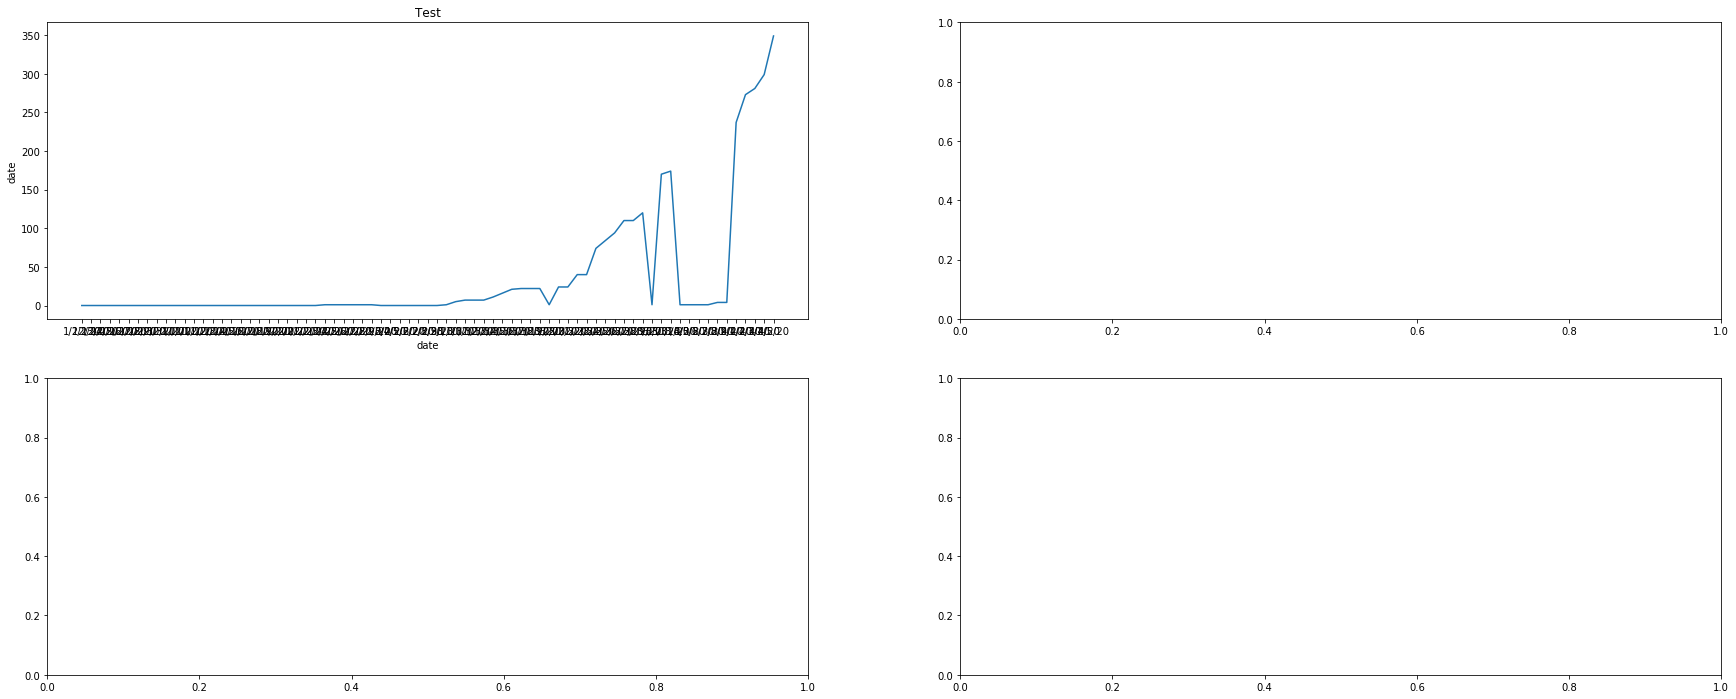

In [164]:
# 여러개씩 배치하고 싶어서 seaborn갖고 왔는데 모르겠다.
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(30,12)

sns.lineplot(data=world3, x="date", y="Afghanistan", ax=ax1)



ax1.set(ylabel='date',title="Test")


# 나라를 검색하면 그 나라 그래프만 나오는 함수

나라를 입력하세요[첫 글자는 대문자] : China


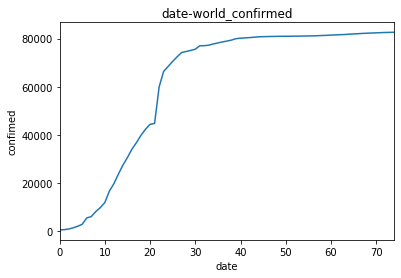

In [177]:
def country_search(a):
    world5 = world3[a]

    world5.plot()
    plt.title("date-world_confirmed")
    plt.xlabel("date")
    plt.ylabel("confimed")
    plt.show()

input_country = input("나라를 입력하세요[첫 글자는 대문자] : ")
country_search(input_country)

# 상위 10나라, 하위 10나라

# 누적확진자 수 말고 날짜별 확진자수

In [193]:
world_day = world3
world_day

Country/Region,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe,day_confirmed,Afghanistan_day
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,4/1/20,237,259,847,390,8,7,1054,571,4862,...,338,181,143,218,134,0,36,8,67,67
71,4/2/20,273,277,986,428,8,9,1133,663,5116,...,350,205,146,233,161,0,39,9,99,99
72,4/3/20,281,304,1171,439,8,15,1265,736,5330,...,369,227,153,237,194,0,39,9,44,44
73,4/4/20,299,333,1251,466,10,15,1451,770,5550,...,400,266,155,240,217,0,39,9,26,26


In [188]:
def day_count_confirmed(df, col, new_name):
    l = list()
    for i in df.index:
        if (i==0) or (i==1):
            l.append(df.loc[i,col])
        else:
            l.append(df.loc[i, col] - df.loc[i-2, col])
    df[new_name] = l

In [209]:
count = 1
for i in range(world_day.shape[1]):
    i += 1
    
    day_count_confirmed(world_day, world3.iloc[:,i], world3.columns[i]+"day")

KeyError: "None of [Int64Index([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,\n              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,\n              0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,\n              1,   1,   1,   1,   1,   1,   1,   4,   4,   5,   7,   7,   7,\n             11,  16,  21,  22,  22,  22,  24,  24,  40,  40,  74,  84,  94,\n            110, 110, 120, 170, 174, 237, 273, 281, 299, 349],\n           dtype='int64', name='Country/Region')] are in the [index]"

In [205]:
world3.iloc[:,1]

0       0
1       0
2       0
3       0
4       0
     ... 
70    237
71    273
72    281
73    299
74    349
Name: Afghanistan, Length: 75, dtype: int64

In [208]:
world3.columns[1]

'Afghanistan'